# Case Study - World Happiness Analysis Project

## Table of Contents

1. Importing Libraries
2. Import Data - 2017 Data
3. Data Consistency Check - 2017 Data
4. Data Preparation for Regression Analysis
* a. happiness_score_2017 vs economy_gdp_2017
* b. happiness_score_2017 vs family_2017
* c. happiness_score_2017 vs health_life_expectancy_2017
* d. happiness_score_2017 vs freedom_2017
* e. happiness_score_2017 vs trust_2017
* f. happiness_score_2017 vs generosity_2017
* g. happiness_score_2017 vs dystopia_residual_2017
5. Regression Analysis
* a. happiness_score_2017 vs economy_gdp_2017
* b. happiness_score_2017 vs family_2017
* c. happiness_score_2017 vs health_life_expectancy_2017
* d. happiness_score_2017 vs freedom_2017
* e. happiness_score_2017 vs trust_2017
* f. happiness_score_2017 vs generosity_2017
* g. happiness_score_2017 vs dystopia_residual_2017

# 01. Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data

In [32]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [33]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2017 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2017_clean_data.csv'), index_col = False)

In [34]:
df_2017.head()

,Unnamed: 0,Country,happiness_rank_2017,happiness_score_2017,whisker_high_2017,whisker_low_2017,economy_gdp_2017,family_2017,health_life_expectancy_2017,freedom_2017,generosity_2017,trust_2017,dystopia_residual_2017
0,0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [35]:
# Drop the redundant columns
df_2017 = df_2017.drop(['Unnamed: 0'],axis = 1)

In [36]:
df_2017.shape

(155, 12)

In [37]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      155 non-null    object 
 1   happiness_rank_2017          155 non-null    int64  
 2   happiness_score_2017         155 non-null    float64
 3   whisker_high_2017            155 non-null    float64
 4   whisker_low_2017             155 non-null    float64
 5   economy_gdp_2017             155 non-null    float64
 6   family_2017                  155 non-null    float64
 7   health_life_expectancy_2017  155 non-null    float64
 8   freedom_2017                 155 non-null    float64
 9   generosity_2017              155 non-null    float64
 10  trust_2017                   155 non-null    float64
 11  dystopia_residual_2017       155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


# 03a. Data Consistency Check - 2017 Data

In [38]:
# check for missing values
df_2017.isnull().sum()

Country                        0
happiness_rank_2017            0
happiness_score_2017           0
whisker_high_2017              0
whisker_low_2017               0
economy_gdp_2017               0
family_2017                    0
health_life_expectancy_2017    0
freedom_2017                   0
generosity_2017                0
trust_2017                     0
dystopia_residual_2017         0
dtype: int64

Confirmed no missing values

In [39]:
# Finding Duplicates
df_dups_2017 = df_2017[df_2017.duplicated()]

In [40]:
df_dups_2017

,Country,happiness_rank_2017,happiness_score_2017,whisker_high_2017,whisker_low_2017,economy_gdp_2017,family_2017,health_life_expectancy_2017,freedom_2017,generosity_2017,trust_2017,dystopia_residual_2017


Confirmed no duplicated values.

In [41]:
df_2017.describe()

,happiness_rank_2017,happiness_score_2017,whisker_high_2017,whisker_low_2017,economy_gdp_2017,family_2017,health_life_expectancy_2017,freedom_2017,generosity_2017,trust_2017,dystopia_residual_2017
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


# 04a. Data Preparation for Regression Analysis - 2017 Data

### happiness_score_2017 vs economy_gdp_2017

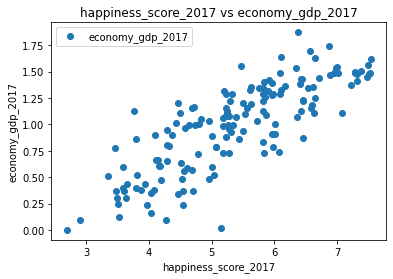

In [42]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2017.plot(x = 'happiness_score_2017', y='economy_gdp_2017',style='o')
plt.title('happiness_score_2017 vs economy_gdp_2017')  
plt.xlabel('happiness_score_2017')  
plt.ylabel('economy_gdp_2017')  
plt.show()

In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2017['happiness_score_2017'].values.reshape(-1,1)
y = df_2017['economy_gdp_2017'].values.reshape(-1,1)

In [44]:
X

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599998],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.97100019],
       [5.964

In [45]:
y

array([[1.61646318],
       [1.48238301],
       [1.48063302],
       [1.56497955],
       [1.44357193],
       [1.50394464],
       [1.47920442],
       [1.40570605],
       [1.49438727],
       [1.48441494],
       [1.37538242],
       [1.10970628],
       [1.48709726],
       [1.54625928],
       [1.53570664],
       [1.48792338],
       [1.46378076],
       [1.7419436 ],
       [1.44163394],
       [1.25278461],
       [1.62634337],
       [1.10735321],
       [1.35268235],
       [1.18529546],
       [1.15318382],
       [1.69227767],
       [1.34327984],
       [1.2175597 ],
       [0.87200195],
       [1.23374844],
       [1.43092346],
       [1.12786877],
       [1.43362653],
       [1.38439786],
       [1.87076569],
       [1.07062232],
       [1.53062356],
       [1.3613559 ],
       [1.63295245],
       [1.32539356],
       [1.48841226],
       [1.29121542],
       [0.7372992 ],
       [1.0008204 ],
       [0.9097845 ],
       [1.29178786],
       [0.78644109],
       [1.395

In [46]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05a. Regression Analysis - 2017 Data

### happiness_score_2017 vs economy_gdp_2017

In [47]:
# create a regression object

regression = LinearRegression()

In [48]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [49]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

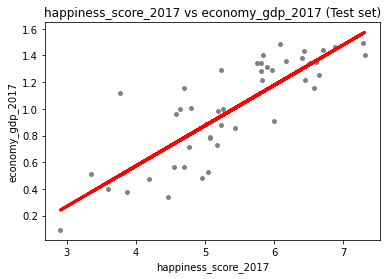

In [50]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs economy_gdp_2017 (Test set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('economy_gdp_2017')
plot_test.show()

In [51]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [52]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.30227197]]
Mean squared error:  0.04316142878764354
R2 score:  0.6959484311497599


The plot (test model) shows a positive relationship, so the coefficient is positive (0.302). The slope means that as happiness_score_2017 rises, as well as the economy_gdp_2017 rises too. In this case, the MSE shows 0.043, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2017 to happiness_score_2017. The R2 is 70 percent, which the data isn't fit that great. 

In [53]:
y_predicted

array([[1.33576718],
       [0.92890919],
       [0.37514686],
       [0.73908231],
       [1.35118309],
       [1.57365528],
       [1.17737662],
       [0.78200499],
       [1.12357221],
       [0.71097104],
       [0.92921144],
       [0.9428137 ],
       [0.53414192],
       [1.12750175],
       [0.74543   ],
       [1.2027675 ],
       [1.29828543],
       [0.2409381 ],
       [1.00417479],
       [0.62935761],
       [0.86271153],
       [1.56458706],
       [0.51388973],
       [0.44829671],
       [1.22725162],
       [0.80618673],
       [0.50119429],
       [1.10332002],
       [0.88659101],
       [0.7810981 ],
       [1.44579413],
       [1.37355118],
       [0.89656598],
       [0.87752293],
       [1.36055356],
       [1.1468472 ],
       [0.81525481],
       [0.89656598],
       [1.31370134],
       [0.76658909],
       [0.95339318],
       [1.16830854],
       [1.39229212],
       [1.11903817],
       [1.31007405],
       [0.94523185],
       [1.12175857]])

In [54]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.343280,1.335767
1,0.730573,0.928909
2,0.511136,0.375147
3,0.560479,0.739082
4,1.153184,1.351183
5,1.405706,1.573655
6,0.909784,1.177377
7,0.564305,0.782005
8,1.217684,1.123572
9,0.339234,0.710971


In [55]:
# predict

y_predicted_train = regression.predict(X_train) 

In [56]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.30227197]]
Mean squared error:  0.06705230740378787
R2 score:  0.6482061570830653


The plot (train model) shows a positive relationship, so the coefficient is positive (0.302). The slope means that as happiness_score_2017 rises, as well as the economy_gdp_2017 rises too. In this case, the MSE shows 0.067, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2017 to happiness_score_2017. The R2 is 64.8 percent, which the data isn't fit that great.

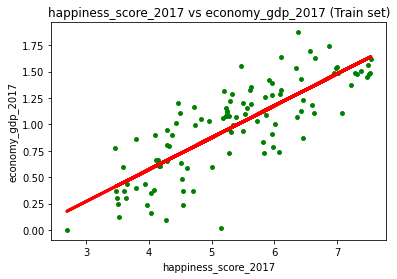

In [58]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs economy_gdp_2017 (Train set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('economy_gdp_2017')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE being even larger on the train set. The R2 is higher in train set compared to test set. 

# 04b. Data Preparation for Regression Analysis - 2017 Data

### happiness_score_2017 vs family_2017

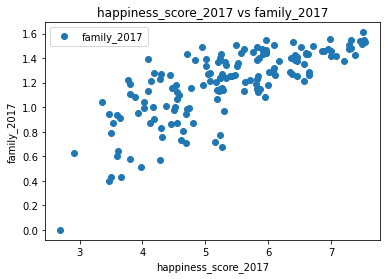

In [59]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2017.plot(x = 'happiness_score_2017', y='family_2017',style='o')
plt.title('happiness_score_2017 vs family_2017')  
plt.xlabel('happiness_score_2017')  
plt.ylabel('family_2017')  
plt.show()

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2017['happiness_score_2017'].values.reshape(-1,1)
y = df_2017['family_2017'].values.reshape(-1,1)

In [61]:
X

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599998],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.97100019],
       [5.964

In [62]:
y

array([[1.53352356],
       [1.55112159],
       [1.61057401],
       [1.51691175],
       [1.54024673],
       [1.42893922],
       [1.48134899],
       [1.54819512],
       [1.47816217],
       [1.51004195],
       [1.37628996],
       [1.41640365],
       [1.45994496],
       [1.41992056],
       [1.55823112],
       [1.47252035],
       [1.4623127 ],
       [1.45758367],
       [1.49646008],
       [1.28402495],
       [1.26641023],
       [1.431306  ],
       [1.43388522],
       [1.44045115],
       [1.21086216],
       [1.35381436],
       [1.48841166],
       [1.41222787],
       [1.25558519],
       [1.37319255],
       [1.38777685],
       [1.42579246],
       [1.38456535],
       [1.5320909 ],
       [1.27429688],
       [1.40218294],
       [1.2866776 ],
       [1.38022852],
       [1.25969875],
       [1.50505924],
       [1.32311046],
       [1.28464603],
       [1.28721571],
       [1.28616881],
       [1.18212509],
       [1.44571197],
       [1.54896915],
       [1.444

In [63]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05b. Regression Analysis - 2017 Data

### happiness_score_2017 vs family_2017

In [64]:
# create a regression object

regression = LinearRegression()

In [65]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

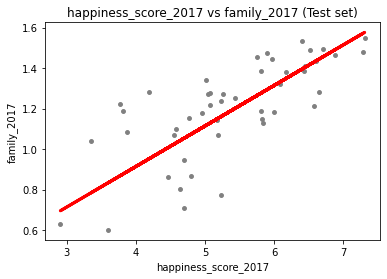

In [67]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs family_2017 (Test set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('family_2017')
plot_test.show()

In [68]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [69]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.19968455]]
Mean squared error:  0.027931094777674095
R2 score:  0.5071675144476804


The plot (test model) shows a positive relationship, so the coefficient is positive (0.200). The slope means that as happiness_score_2017 rises, as well as the family_2017 rises too. In this case, the MSE shows 0.028, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of family_2017 to happiness_score_2017. The R2 is 50.7 percent, which the data isn't fit that great.

In [70]:
y_predicted

array([[1.4192922 ],
       [1.15051686],
       [0.78469472],
       [1.02511492],
       [1.42947614],
       [1.57644398],
       [1.31465747],
       [1.05347016],
       [1.27911362],
       [1.00654427],
       [1.15071653],
       [1.15970235],
       [0.8897288 ],
       [1.28170953],
       [1.02930827],
       [1.33143099],
       [1.39453131],
       [0.69603479],
       [1.20023823],
       [0.95262944],
       [1.10678588],
       [1.5704534 ],
       [0.87634995],
       [0.8330184 ],
       [1.34760551],
       [1.06944491],
       [0.86796319],
       [1.26573478],
       [1.12256096],
       [1.05287106],
       [1.49197735],
       [1.44425277],
       [1.12915055],
       [1.11657047],
       [1.43566639],
       [1.29448936],
       [1.07543539],
       [1.12915055],
       [1.40471524],
       [1.04328623],
       [1.16669128],
       [1.30866698],
       [1.45663327],
       [1.27611838],
       [1.40231901],
       [1.16129981],
       [1.27791551]])

In [71]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.488412,1.419292
1,1.143945,1.150517
2,1.041990,0.784695
3,1.067951,1.025115
4,1.210862,1.429476
5,1.548195,1.576444
6,1.182125,1.314657
7,0.946018,1.053470
8,1.150091,1.279114
9,0.864669,1.006544


In [72]:
# predict

y_predicted_train = regression.predict(X_train) 

In [73]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [74]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.19968455]]
Mean squared error:  0.03899439031446282
R2 score:  0.580309003725975


The plot (train model) shows a positive relationship, so the coefficient is positive (0.199). The slope means that as happiness_score_2017 rises, as well as the family_2017 rises too. In this case, the MSE shows 0.039, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of family_2017 to happiness_score_2017. The R2 is 58.03 percent, which the data isn't fit that great.

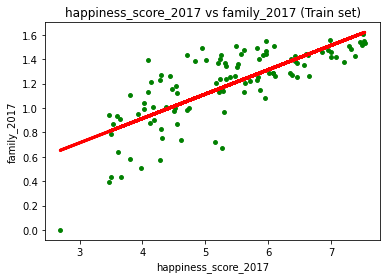

In [75]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs family_2017 (Train set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('family_2017')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set. 

# 04c. Data Preparation for Regression Analysis - 2017 Data

### happiness_score_2017 vs health_life_expectancy_2017

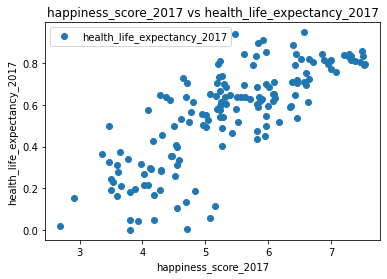

In [76]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2017.plot(x ='happiness_score_2017', y='health_life_expectancy_2017',style='o')
plt.title('happiness_score_2017 vs health_life_expectancy_2017')  
plt.xlabel('happiness_score_2017')  
plt.ylabel('health_life_expectancy_2017')  
plt.show()

In [77]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2017['happiness_score_2017'].values.reshape(-1,1)
y = df_2017['health_life_expectancy_2017'].values.reshape(-1,1)

In [78]:
X

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599998],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.97100019],
       [5.964

In [79]:
y

array([[0.7966665 ],
       [0.79256552],
       [0.83355212],
       [0.85813129],
       [0.80915767],
       [0.81069613],
       [0.83455765],
       [0.81675971],
       [0.83087516],
       [0.84388679],
       [0.838404  ],
       [0.75950927],
       [0.81532842],
       [0.77428663],
       [0.80978262],
       [0.79895073],
       [0.81809187],
       [0.8450895 ],
       [0.80533594],
       [0.8194797 ],
       [0.72679824],
       [0.61655235],
       [0.754444  ],
       [0.69513708],
       [0.709979  ],
       [0.94949239],
       [0.82194424],
       [0.71921682],
       [0.54023999],
       [0.70615613],
       [0.84446585],
       [0.64723903],
       [0.79398423],
       [0.8889606 ],
       [0.71009809],
       [0.59502792],
       [0.59014833],
       [0.51998329],
       [0.63210571],
       [0.71273291],
       [0.65313303],
       [0.61878443],
       [0.65309596],
       [0.68563622],
       [0.59601855],
       [0.69947535],
       [0.49827263],
       [0.853

In [80]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05c. Regression Analysis - 2017 Data

### happiness_score_2017 vs health_life_expectancy_2017

In [81]:
# create a regression object

regression = LinearRegression()

In [82]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [83]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

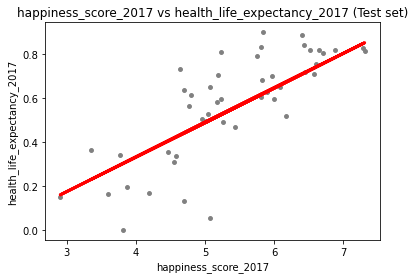

In [84]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs health_life_expectancy_2017 (Test set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('health_life_expectancy_2017')
plot_test.show()

In [85]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [86]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.157132]]
Mean squared error:  0.022787166983750887
R2 score:  0.6066987273093641


The plot (test model) shows a positive relationship, so the coefficient is positive (0.157). The slope means that as happiness_score_2017 rises, as well as the health_life_expectancy_2017 rises too. In this case, the MSE shows 0.023, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2017 to happiness_score_2017. The R2 is 60.7 percent, which the data isn't fit that great.

In [87]:
y_predicted

array([[0.72939779],
       [0.51789817],
       [0.23003231],
       [0.41921923],
       [0.73741155],
       [0.85306071],
       [0.6470606 ],
       [0.44153201],
       [0.61909111],
       [0.40460597],
       [0.51805529],
       [0.52512624],
       [0.31268374],
       [0.62113383],
       [0.42251899],
       [0.66025971],
       [0.70991342],
       [0.1602657 ],
       [0.55702397],
       [0.36218033],
       [0.48348621],
       [0.84834671],
       [0.30215591],
       [0.26805827],
       [0.67298745],
       [0.45410256],
       [0.29555636],
       [0.60856328],
       [0.49589963],
       [0.44106057],
       [0.78659382],
       [0.74903929],
       [0.50108499],
       [0.49118572],
       [0.74228266],
       [0.6311903 ],
       [0.45881647],
       [0.50108499],
       [0.71792717],
       [0.43351826],
       [0.53062584],
       [0.64234668],
       [0.75878152],
       [0.61673415],
       [0.71604157],
       [0.52638328],
       [0.61814831]])

In [88]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.821944,0.729398
1,0.582569,0.517898
2,0.364509,0.230032
3,0.309988,0.419219
4,0.709979,0.737412
5,0.816760,0.853061
6,0.596019,0.647061
7,0.132892,0.441532
8,0.685158,0.619091
9,0.353410,0.404606


In [89]:
# predict

y_predicted_train = regression.predict(X_train) 

In [90]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [91]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.157132]]
Mean squared error:  0.021361893817223792
R2 score:  0.6098176679960883


The plot (train model) shows a positive relationship, so the coefficient is positive (0.157). The slope means that as happiness_score_2017 rises, as well as the health_life_expectancy_2017 rises too. In this case, the MSE shows 0.021, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2017 to happiness_score_2017. The R2 is 61 percent, which the data isn't fit that great.

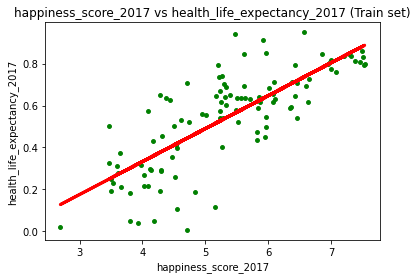

In [92]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs health_life_expectancy_2017 (Train set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('health_life_expectancy_2017')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04d. Data Preparation for Regression Analysis - 2017 Data

### happiness_score_2017 vs freedom_2017

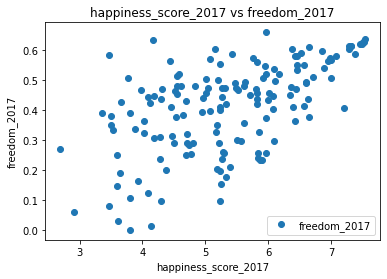

In [93]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2017.plot(x = 'happiness_score_2017', y='freedom_2017',style='o')
plt.title('happiness_score_2017 vs freedom_2017')  
plt.xlabel('happiness_score_2017')  
plt.ylabel('freedom_2017')  
plt.show()

In [94]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2017['happiness_score_2017'].values.reshape(-1,1)
y = df_2017['freedom_2017'].values.reshape(-1,1)

In [95]:
X

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599998],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.97100019],
       [5.964

In [96]:
y

array([[0.63542259],
       [0.62600672],
       [0.62716264],
       [0.62007058],
       [0.61795086],
       [0.58538449],
       [0.61110091],
       [0.61406213],
       [0.6129241 ],
       [0.60160738],
       [0.4059886 ],
       [0.58013165],
       [0.56776619],
       [0.50574052],
       [0.57311034],
       [0.56251138],
       [0.53977072],
       [0.59662789],
       [0.50819004],
       [0.37689528],
       [0.60834527],
       [0.43745375],
       [0.49094617],
       [0.4945192 ],
       [0.41273001],
       [0.54984057],
       [0.58876705],
       [0.57939225],
       [0.53131062],
       [0.55002683],
       [0.47022212],
       [0.58020073],
       [0.36146659],
       [0.40878123],
       [0.60413098],
       [0.47748742],
       [0.44975057],
       [0.51863074],
       [0.49633759],
       [0.29581746],
       [0.53674692],
       [0.40226498],
       [0.44755185],
       [0.4551982 ],
       [0.43245253],
       [0.52034211],
       [0.65824866],
       [0.256

In [97]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05d. Regression Analysis - 2017 Data

### happiness_score_2017 vs freedom_2017

In [98]:
# create a regression object

regression = LinearRegression()

In [99]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [100]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

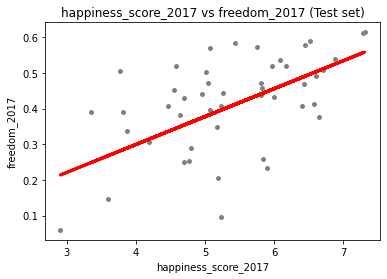

In [101]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs freedom_2017 (Test set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('freedom_2017')
plot_test.show()

In [102]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [103]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0781497]]
Mean squared error:  0.01262338801588883
R2 score:  0.27595389125465575


The plot (test model) shows a positive relationship, so the coefficient is positive (0.079). The slope means that as happiness_score_2017 rises, as well as the freedom_2017 rises too. In this case, the MSE shows 0.013, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2017 to happiness_score_2017. The R2 is 27.6 percent, which the data isn't fit that great.

In [104]:
y_predicted

array([[0.49716179],
       [0.39197232],
       [0.24880205],
       [0.34289429],
       [0.50114743],
       [0.55866562],
       [0.45621133],
       [0.35399156],
       [0.44230069],
       [0.33562637],
       [0.39205046],
       [0.3955672 ],
       [0.28990879],
       [0.44331664],
       [0.34453542],
       [0.46277592],
       [0.48747122],
       [0.21410358],
       [0.41143156],
       [0.31452595],
       [0.37485751],
       [0.55632111],
       [0.28467277],
       [0.26771429],
       [0.46910607],
       [0.36024353],
       [0.28139048],
       [0.43706467],
       [0.38103133],
       [0.35375709],
       [0.52560827],
       [0.5069305 ],
       [0.38361027],
       [0.37868686],
       [0.50357008],
       [0.44831823],
       [0.362588  ],
       [0.38361027],
       [0.49145686],
       [0.35000592],
       [0.39830243],
       [0.45386686],
       [0.5117758 ],
       [0.44112845],
       [0.49051906],
       [0.39619239],
       [0.44183179]])

In [105]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.588767,0.497162
1,0.348080,0.391972
2,0.390018,0.248802
3,0.452764,0.342894
4,0.412730,0.501147
5,0.614062,0.558666
6,0.432453,0.456211
7,0.430389,0.353992
8,0.457004,0.442301
9,0.408843,0.335626


In [106]:
# predict

y_predicted_train = regression.predict(X_train) 

In [107]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [108]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0781497]]
Mean squared error:  0.016187583887033757
R2 score:  0.3378231745355915


The plot (train model) shows a positive relationship, so the coefficient is positive (0.078). The slope means that as happiness_score_2017 rises, as well as the freedom_2017 rises too. In this case, the MSE shows 0.016, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2017 to happiness_score_2017. The R2 is 33.8 percent, which the data isn't fit that great.

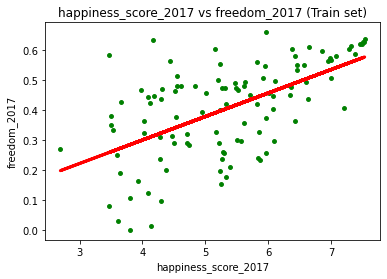

In [109]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs freedom_2017 (Train set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('freedom_2017')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04e. Data Preparation for Regression Analysis - 2017 Data

### happiness_score_2017 vs trust_2017

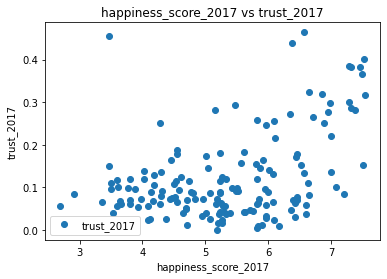

In [110]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2017.plot(x = 'happiness_score_2017', y='trust_2017',style='o')
plt.title('happiness_score_2017 vs trust_2017')  
plt.xlabel('happiness_score_2017')  
plt.ylabel('trust_2017')  
plt.show()

In [111]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2017['happiness_score_2017'].values.reshape(-1,1)
y = df_2017['trust_2017'].values.reshape(-1,1)

In [112]:
X

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599998],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.97100019],
       [5.964

In [113]:
y

array([[0.31596383],
       [0.40077007],
       [0.15352656],
       [0.36700729],
       [0.38261154],
       [0.28266183],
       [0.28737152],
       [0.3828167 ],
       [0.38439873],
       [0.30118373],
       [0.0852421 ],
       [0.10010659],
       [0.22106037],
       [0.13563879],
       [0.29838815],
       [0.27673194],
       [0.25134313],
       [0.31883442],
       [0.26542807],
       [0.08228798],
       [0.32448956],
       [0.11109276],
       [0.03687293],
       [0.05973989],
       [0.13277411],
       [0.46430779],
       [0.15306607],
       [0.17806187],
       [0.07722328],
       [0.07098392],
       [0.17250243],
       [0.03161274],
       [0.06382924],
       [0.0709141 ],
       [0.43929926],
       [0.04666874],
       [0.27343225],
       [0.00896482],
       [0.21515955],
       [0.02421085],
       [0.25704217],
       [0.06560071],
       [0.13068798],
       [0.14013465],
       [0.08998096],
       [0.05930781],
       [0.24652822],
       [0.028

In [114]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05e. Regression Analysis - 2017 Data

### happiness_score_2017 vs trust_2017¶

In [115]:
# create a regression object

regression = LinearRegression()

In [116]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [117]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

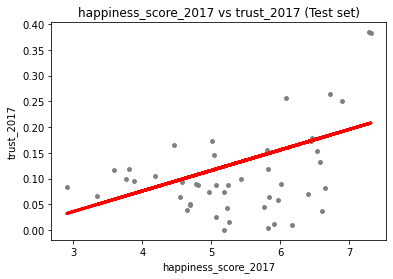

In [118]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs trust_2017 (Test set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('trust_2017')
plot_test.show()

In [119]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [120]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03995471]]
Mean squared error:  0.006445820379847275
R2 score:  0.10805680125004347


The plot (test model) shows a positive relationship, so the coefficient is positive (0.04). The slope means that as happiness_score_2017 rises, as well as the trust_2017 rises too. In this case, the MSE shows 0.006, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2017 to happiness_score_2017. The R2 is 10.8 percent, which the data fit very poor.

In [121]:
y_predicted

array([[0.17686371],
       [0.12308469],
       [0.04988765],
       [0.09799312],
       [0.17890141],
       [0.20830808],
       [0.15592744],
       [0.10366669],
       [0.1488155 ],
       [0.09427733],
       [0.12312464],
       [0.1249226 ],
       [0.07090383],
       [0.14933491],
       [0.09883216],
       [0.15928364],
       [0.17190933],
       [0.03214776],
       [0.13303339],
       [0.08348956],
       [0.11433459],
       [0.20710943],
       [0.06822686],
       [0.05955669],
       [0.16251998],
       [0.10686307],
       [0.06654876],
       [0.14613854],
       [0.11749101],
       [0.10354682],
       [0.19140722],
       [0.18185805],
       [0.11880952],
       [0.11629238],
       [0.18014001],
       [0.15189202],
       [0.1080617 ],
       [0.11880952],
       [0.17394702],
       [0.101629  ],
       [0.12632101],
       [0.15472881],
       [0.18433526],
       [0.14821619],
       [0.17346756],
       [0.12524224],
       [0.14857577]])

In [122]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.153066,0.176864
1,0.073345,0.123085
2,0.066035,0.049888
3,0.064641,0.097993
4,0.132774,0.178901
5,0.382817,0.208308
6,0.089981,0.155927
7,0.051307,0.103667
8,0.004388,0.148816
9,0.165456,0.094277


In [123]:
# predict

y_predicted_train = regression.predict(X_train) 

In [124]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [125]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03995471]]
Mean squared error:  0.00928989876631997
R2 score:  0.18855109070511833


The plot (train model) shows a positive relationship, so the coefficient is positive (0.04). The slope means that as happiness_score_2017 rises, as well as the trust_2017 rises too. In this case, the MSE shows 0.009, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2017 to happiness_score_2017. The R2 is 18.9 percent, which the data fit very poor.

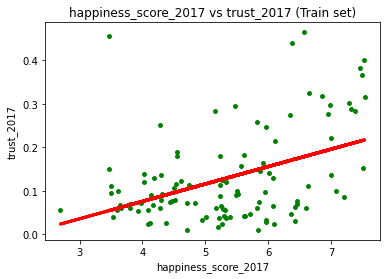

In [126]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs trust_2017 (Train set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('trust_2017')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04f. Data Preparation for Regression Analysis - 2017 Data


### happiness_score_2017 vs generosity_2017

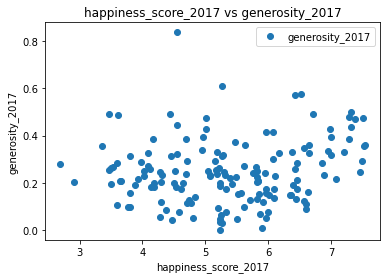

In [128]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2017.plot(x = 'happiness_score_2017', y='generosity_2017',style='o')
plt.title('happiness_score_2017 vs generosity_2017')  
plt.xlabel('happiness_score_2017')  
plt.ylabel('generosity_2017')  
plt.show()

In [129]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2017['happiness_score_2017'].values.reshape(-1,1)
y = df_2017['generosity_2017'].values.reshape(-1,1)

In [130]:
X

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599998],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.97100019],
       [5.964

In [131]:
y

array([[0.36201224],
       [0.35528049],
       [0.47554022],
       [0.29054928],
       [0.24548277],
       [0.47048983],
       [0.43553972],
       [0.50000513],
       [0.38539925],
       [0.47769925],
       [0.33008265],
       [0.21461323],
       [0.31647232],
       [0.39257878],
       [0.42785832],
       [0.33626917],
       [0.23150334],
       [0.28318098],
       [0.49277416],
       [0.32666242],
       [0.36094195],
       [0.16234989],
       [0.08810676],
       [0.10945706],
       [0.12099043],
       [0.34596598],
       [0.57473058],
       [0.17509693],
       [0.28348839],
       [0.21055694],
       [0.12976231],
       [0.57212311],
       [0.25836048],
       [0.19013357],
       [0.33047387],
       [0.14901447],
       [0.14761601],
       [0.32529646],
       [0.2282898 ],
       [0.13654448],
       [0.17266849],
       [0.41660893],
       [0.30167422],
       [0.15011247],
       [0.07825799],
       [0.15846597],
       [0.41598365],
       [0.172

In [132]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05f. Regression Analysis - 2017 Data

### happiness_score_2017 vs generosity_2017

In [133]:
# create a regression object

regression = LinearRegression()

In [134]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [135]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

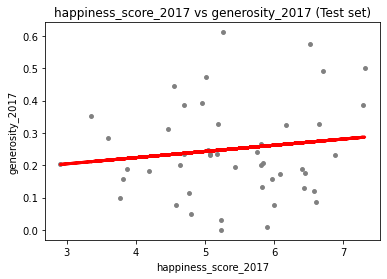

In [136]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs generosity_2017 (Test set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('generosity_2017')
plot_test.show()

In [137]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [138]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01916056]]
Mean squared error:  0.02035162390280468
R2 score:  0.009748096185565824


The plot (test model) shows a positive relationship, so the coefficient is positive (0.019). The slope means that as happiness_score_2017 rises, as well as the generosity_2017 rises too. In this case, the MSE shows 0.020, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2017 to happiness_score_2017. The R2 is 0.9 percent, which the data fit very poor.

In [139]:
y_predicted

array([[0.27235885],
       [0.24656874],
       [0.21146659],
       [0.2345359 ],
       [0.27333604],
       [0.28743822],
       [0.26231872],
       [0.23725671],
       [0.25890814],
       [0.23275397],
       [0.2465879 ],
       [0.24745013],
       [0.22154504],
       [0.25915722],
       [0.23493827],
       [0.2639282 ],
       [0.26998294],
       [0.2029593 ],
       [0.25133971],
       [0.22758062],
       [0.24237257],
       [0.2868634 ],
       [0.22026129],
       [0.21610345],
       [0.26548022],
       [0.23878955],
       [0.21945654],
       [0.25762438],
       [0.24388626],
       [0.23719922],
       [0.27933329],
       [0.27475392],
       [0.24451856],
       [0.24331145],
       [0.27393002],
       [0.2603835 ],
       [0.23936436],
       [0.24451856],
       [0.27096013],
       [0.23627952],
       [0.24812074],
       [0.2617439 ],
       [0.27594188],
       [0.25862073],
       [0.2707302 ],
       [0.24760341],
       [0.25879317]])

In [140]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.574731,0.272359
1,0.236189,0.246569
2,0.354256,0.211467
3,0.444860,0.234536
4,0.120990,0.273336
5,0.500005,0.287438
6,0.078258,0.262319
7,0.236298,0.237257
8,0.133520,0.258908
9,0.312651,0.232754


In [141]:
# predict

y_predicted_train = regression.predict(X_train) 

In [142]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [143]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01916056]]
Mean squared error:  0.016435627023472166
R2 score:  0.029319029928939644


The plot (train model) shows a positive relationship, so the coefficient is positive (0.019). The slope means that as happiness_score_2017 rises, as well as the generosity_2017 rises too. In this case, the MSE shows 0.0164, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2017 to happiness_score_2017. The R2 is 2.9 percent, which the data fit very poor.

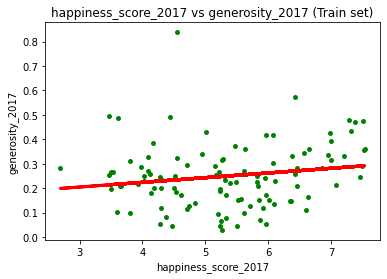

In [144]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs generosity_2017 (Train set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('generosity_2017')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the train set; The R2 is higher in test set compared to train set.

# 04g. Data Preparation for Regression Analysis - 2017 Data

### happiness_score_2017 vs dystopia_residual_2017

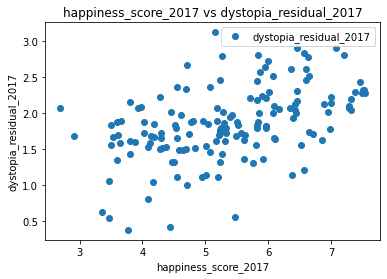

In [145]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2017.plot(x = 'happiness_score_2017', y='dystopia_residual_2017',style='o')
plt.title('happiness_score_2017 vs dystopia_residual_2017')  
plt.xlabel('happiness_score_2017')  
plt.ylabel('dystopia_residual_2017')  
plt.show()

In [146]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2017['happiness_score_2017'].values.reshape(-1,1)
y = df_2017['dystopia_residual_2017'].values.reshape(-1,1)

In [147]:
X

array([[7.53700018],
       [7.52199984],
       [7.50400019],
       [7.49399996],
       [7.46899986],
       [7.37699986],
       [7.31599998],
       [7.31400013],
       [7.28399992],
       [7.28399992],
       [7.21299982],
       [7.079     ],
       [7.00600004],
       [6.99300003],
       [6.97700024],
       [6.95100021],
       [6.89099979],
       [6.86299992],
       [6.71400023],
       [6.65199995],
       [6.64799976],
       [6.63500023],
       [6.60900021],
       [6.59899998],
       [6.57800007],
       [6.57200003],
       [6.52699995],
       [6.454     ],
       [6.454     ],
       [6.45200014],
       [6.44199991],
       [6.42399979],
       [6.42199993],
       [6.40299988],
       [6.375     ],
       [6.35699987],
       [6.34399986],
       [6.16800022],
       [6.10500002],
       [6.09800005],
       [6.08699989],
       [6.08400011],
       [6.0710001 ],
       [6.0079999 ],
       [6.00299978],
       [5.97300005],
       [5.97100019],
       [5.964

In [148]:
y

array([[2.27702665],
       [2.31370735],
       [2.32271528],
       [2.27671623],
       [2.4301815 ],
       [2.2948041 ],
       [2.18726444],
       [2.04645634],
       [2.09753799],
       [2.06521082],
       [2.80175734],
       [2.8986392 ],
       [2.13850641],
       [2.21811342],
       [1.77386904],
       [2.01576996],
       [2.12421036],
       [1.61951208],
       [1.70414352],
       [2.50958586],
       [1.73470354],
       [2.76926708],
       [2.45186186],
       [2.61400533],
       [2.83715487],
       [1.216362  ],
       [1.55686283],
       [2.17240953],
       [2.8938911 ],
       [2.30719995],
       [2.00595474],
       [2.03950834],
       [2.12660742],
       [1.92775774],
       [1.14546442],
       [2.61606812],
       [2.06542969],
       [2.05324745],
       [1.64042521],
       [2.09777665],
       [1.65614939],
       [2.00444889],
       [2.51393056],
       [2.29035258],
       [2.71459389],
       [1.79772282],
       [1.8169136 ],
       [1.813

In [149]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05g. Regression Analysis - 2017 Data

### happiness_score_2017 vs dystopia_residual_2017

In [150]:
# create a regression object

regression = LinearRegression()

In [151]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [152]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

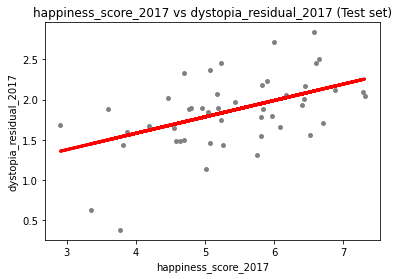

In [153]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs dystopia_residual_2017 (Test set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('dystopia_residual_2017')
plot_test.show()

In [154]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [155]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20367812]]
Mean squared error:  0.15400081400938848
R2 score:  0.265430642302558


The plot (test model) shows a positive relationship, so the coefficient is positive (0.204). The slope means that as happiness_score_2017 rises, as well as the dystopia_residual_2017 rises too. In this case, the MSE shows 0.154, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of dystopia_residual_2017 to happiness_score_2017. The R2 is 26.5 percent, which the data doesn't fit great.

In [156]:
y_predicted

array([[2.09615921],
       [1.82200852],
       [1.44887015],
       [1.6940986 ],
       [2.10654682],
       [2.25645392],
       [1.98943184],
       [1.72302094],
       [1.95317714],
       [1.67515655],
       [1.82221218],
       [1.83137771],
       [1.55600484],
       [1.95582496],
       [1.69837583],
       [2.00654082],
       [2.07090311],
       [1.35843706],
       [1.87272429],
       [1.62016346],
       [1.77740294],
       [2.25034354],
       [1.54235843],
       [1.49816027],
       [2.02303882],
       [1.73931517],
       [1.53380394],
       [1.93953072],
       [1.79349351],
       [1.72240985],
       [2.17029801],
       [2.12161897],
       [1.80021489],
       [1.78738322],
       [2.11286087],
       [1.96886038],
       [1.74542546],
       [1.80021489],
       [2.08129071],
       [1.71263333],
       [1.83850641],
       [1.98332155],
       [2.13424707],
       [1.95012199],
       [2.07884656],
       [1.83300711],
       [1.95195506]])

In [157]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.556863,2.096159
1,2.065811,1.822009
2,0.621130,1.448870
3,1.651902,1.694099
4,2.837155,2.106547
5,2.046456,2.256454
6,2.714594,1.989432
7,2.333646,1.723021
8,2.176831,1.953177
9,2.015744,1.675157


In [158]:
# predict

y_predicted_train = regression.predict(X_train) 

In [159]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [160]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20367812]]
Mean squared error:  0.20908867162628308
R2 score:  0.21153550673218557


The plot (train model) shows a positive relationship, so the coefficient is positive (0.204). The slope means that as happiness_score_2017 rises, as well as the dystopia_residual_2017 rises too. In this case, the MSE shows 0.209, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of dystopia_residual_2017 to happiness_score_2017. The R2 is 21.2 percent, which the data doesn't fit great.

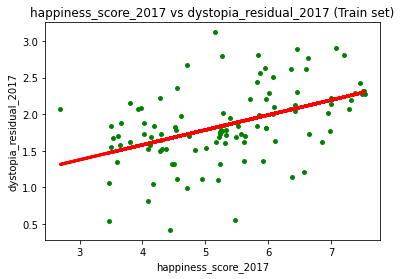

In [161]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2017 vs dystopia_residual_2017 (Train set)')
plot_test.xlabel('happiness_score_2017')
plot_test.ylabel('dystopia_residual_2017')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.